# Un nouveau Jupyter Notebook / continuation travail précedent / la partie machine Learning prediction

In [24]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# j'importe ma data frame travaillée auparavant par la methode magique de python '%store -r':

In [3]:
%store -r accidents_France_2016_2021_

data_accident = accidents_France_2016_2021_.copy()
data_accident

# visualisation de data :

,Num_Acc num_veh,mois,an,lum,dep,agg,int,atm,col,catr,...,sexe,trajet,secu1,secu2,actp,etatp,catv,obsm,occutc,age
0,202100000001 B01,10,5,2,30,0,1,1,1,3,...,1,1,0.0,9.0,0,-1.0,1.0,2.0,0.0,22
1,202100000001 A01,10,5,2,30,0,1,1,1,3,...,1,1,1.0,-1.0,0,-1.0,7.0,9.0,0.0,44
2,202100000002 A01,8,5,1,51,0,3,1,3,3,...,1,3,1.0,-1.0,0,-1.0,7.0,2.0,0.0,39
3,202100000002 B01,8,5,1,51,0,3,1,3,3,...,1,3,1.0,-1.0,0,-1.0,7.0,2.0,0.0,29
4,202100000003 A01,6,5,1,85,1,1,7,6,4,...,1,1,1.0,0.0,0,-1.0,7.0,1.0,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767032,201600059431 A01,11,0,1,976,1,3,1,3,2,...,1,3,21.0,0.0,0,0.0,30.0,2.0,0.0,23
767033,201600059431 B01,11,0,1,976,1,3,1,3,2,...,1,3,21.0,0.0,0,0.0,30.0,2.0,0.0,27
767034,201600059432 A01,11,0,1,976,1,6,1,3,2,...,1,0,21.0,0.0,0,0.0,2.0,2.0,0.0,50
767035,201600059432 A01,11,0,1,976,1,6,1,3,2,...,1,3,21.0,0.0,0,0.0,2.0,2.0,0.0,50


In [39]:
 %who 

LabelEncoder	 RandomForestClassifier	 X	 X_test	 X_train	 accidents_France_2016_2021_	 browser_labelEncoder	 clf	 columns	 
country_labelEncoder	 cross_val_predict	 cross_val_score	 data_accident	 pd	 sex_labelEncoder	 source_labelEncoder	 train_test_split	 y	 
y_test	 y_train	 


In [50]:
%whos

Variable                      Type                      Data/Info
-----------------------------------------------------------------
LabelEncoder                  type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
RandomForestClassifier        ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X                             DataFrame                         lum  trajet  grav<...>[767037 rows x 9 columns]
X_test                        DataFrame                         lum  trajet  grav<...>[230112 rows x 9 columns]
X_train                       DataFrame                         lum  trajet  grav<...>[536925 rows x 9 columns]
accidents_France_2016_2021_   DataFrame                          Num_Acc num_veh <...>767037 rows x 29 columns]
age_labelEncoder              LabelEncoder              LabelEncoder()
agg_labelEncoder              LabelEncoder              LabelEncoder()
atm_labelEncoder              LabelEncoder            

# On va definir nos features et nos  target pour les utiliser dans notre ML et la prediction :

In [4]:
# On va definir nos features et nos  target pour les utiliser dans notre ML et la prediction :

columns = ['lum', 'trajet', 'grav','atm', 'surf', 'vma', 'age', 'catr','agg']
data_accident2 = data_accident[columns]
data_accident2.head()

,lum,trajet,grav,atm,surf,vma,age,catr,agg
0,2,1,Blessé hospitalisé,1,2,5,22,3,0
1,2,1,Indemne,1,2,5,44,3,0
2,1,3,Blessé léger,1,2,5,39,3,0
3,1,3,Blessé hospitalisé,1,2,5,29,3,0
4,1,1,Indemne,7,2,3,27,4,1


# Mon objectif est de prédire la gravité des accidents, je veux placer la colonne 'grav' comme derniere colonne dans ma data set, je change l'emplacement de la colonne : 

In [5]:
# créer une liste avec l'ordre souhaité des colonnes
new_order = list(data_accident2.columns[:2]) + list(data_accident2.columns[3:]) + ['grav']

# réindexer la dataframe avec le nouvel ordre de colonnes
data_accident2 = data_accident2.reindex(columns=new_order)


In [6]:
# Regardons maintenant la data :
data_accident2

,lum,trajet,atm,surf,vma,age,catr,agg,grav
0,2,1,1,2,5,22,3,0,Blessé hospitalisé
1,2,1,1,2,5,44,3,0,Indemne
2,1,3,1,2,5,39,3,0,Blessé léger
3,1,3,1,2,5,29,3,0,Blessé hospitalisé
4,1,1,7,2,3,27,4,1,Indemne
...,...,...,...,...,...,...,...,...,...
767032,1,3,1,2,7,23,2,1,Blessé léger
767033,1,3,1,2,7,27,2,1,Blessé léger
767034,1,0,1,2,7,50,2,1,Blessé léger
767035,1,3,1,2,7,50,2,1,Blessé léger


In [ ]:
# Je souhaite voir le Dtype de mes données et l'information generale de ma data frame :

In [ ]:
data_accident2.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767037 entries, 0 to 767036
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   lum     767037 non-null  int64 
 1   trajet  767037 non-null  int64 
 2   atm     767037 non-null  int64 
 3   surf    767037 non-null  int64 
 4   vma     767037 non-null  int64 
 5   age     767037 non-null  int64 
 6   catr    767037 non-null  int64 
 7   agg     767037 non-null  int64 
 8   grav    767037 non-null  object
dtypes: int64(8), object(1)
memory usage: 52.7+ MB

# on voit que 'grav' c'est un  object, pour entrainer nous donées ils deuvent être homogènes donc on va transformer object en int64

In [8]:
print(data_accident2['grav'].unique())

['Blessé hospitalisé' 'Indemne' 'Blessé léger' 'Tué' -1]


In [9]:
data_accident2['grav'].replace({'Blessé hospitalisé': 3, 'Indemne': 1, 'Blessé léger': 2, 'Tué': 4, '-1': 0}, inplace=True)

In [10]:
print(data_accident2['grav'].unique())

[ 3  1  2  4 -1]


# Maintenant 'grav' c'est un 'int64' et non pas 'object' :

In [11]:
# Maintenant 'grav' c'est un 'int64' et non pas 'object' :

data_accident2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767037 entries, 0 to 767036
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   lum     767037 non-null  int64
 1   trajet  767037 non-null  int64
 2   atm     767037 non-null  int64
 3   surf    767037 non-null  int64
 4   vma     767037 non-null  int64
 5   age     767037 non-null  int64
 6   catr    767037 non-null  int64
 7   agg     767037 non-null  int64
 8   grav    767037 non-null  int64
dtypes: int64(9)
memory usage: 52.7 MB


# Nous allons déterminer nos X, Y et les encoder pour entraîner notre modèle sur la sélection des données :

In [14]:
X = data_accident2[columns[:-1]]
y = data_accident2['grav']
lum_labelEncoder = LabelEncoder()
trajet_labelEncoder = LabelEncoder()
surf_labelEncoder = LabelEncoder()
vma_labelEncoder = LabelEncoder()
age_labelEncoder = LabelEncoder()
agg_labelEncoder = LabelEncoder()
catr_labelEncoder = LabelEncoder()
atm_labelEncoder = LabelEncoder()


X['lum'] = lum_labelEncoder.fit_transform(data_accident2['lum'])
X['trajet'] = trajet_labelEncoder.fit_transform(data_accident2['trajet'])
X['surf'] = surf_labelEncoder.fit_transform(data_accident2['surf'])
X['vma'] = vma_labelEncoder.fit_transform(data_accident2['vma'])
X['age'] = age_labelEncoder.fit_transform(data_accident2['age'])
X['agg'] = agg_labelEncoder.fit_transform(data_accident2['agg'])
X['catr'] = catr_labelEncoder.fit_transform(data_accident2['catr'])
X['atm'] = atm_labelEncoder.fit_transform(data_accident2['atm'])

# création des variables indicatrices à partir des variables catégorielles de l'ensemble de données représenté par la variable "X":

In [15]:
X = pd.get_dummies(X)
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (536925, 9) | Shape du dataset de test : (230112, 9)


In [27]:
#RandomForest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [26]:
X_train

,lum,trajet,grav,atm,surf,vma,age,catr,agg
394059,3,4,2,2,2,1,30,2,0
674815,1,5,2,2,2,7,47,2,0
124618,2,1,3,2,2,3,58,3,0
353515,2,3,2,2,2,3,54,3,1
37171,1,1,1,2,2,3,38,2,1
...,...,...,...,...,...,...,...,...,...
359783,1,5,1,3,3,3,50,3,1
152315,1,0,1,2,2,5,40,2,0
117952,1,8,1,2,2,6,0,2,0
435829,3,4,1,2,2,1,26,3,1


# Création une matrice de confusion (confusion matrix) et la visualiser sous la forme d'une heatmap:

<AxesSubplot:>

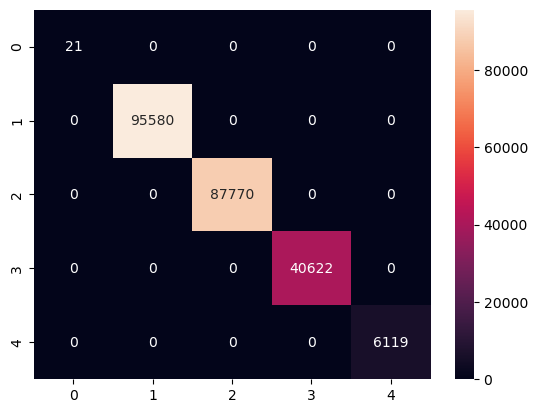

In [25]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [20]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [21]:
feature_imp

grav      0.971610
age       0.007465
catr      0.007314
trajet    0.005382
agg       0.005009
vma       0.001762
lum       0.000685
atm       0.000410
surf      0.000362
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

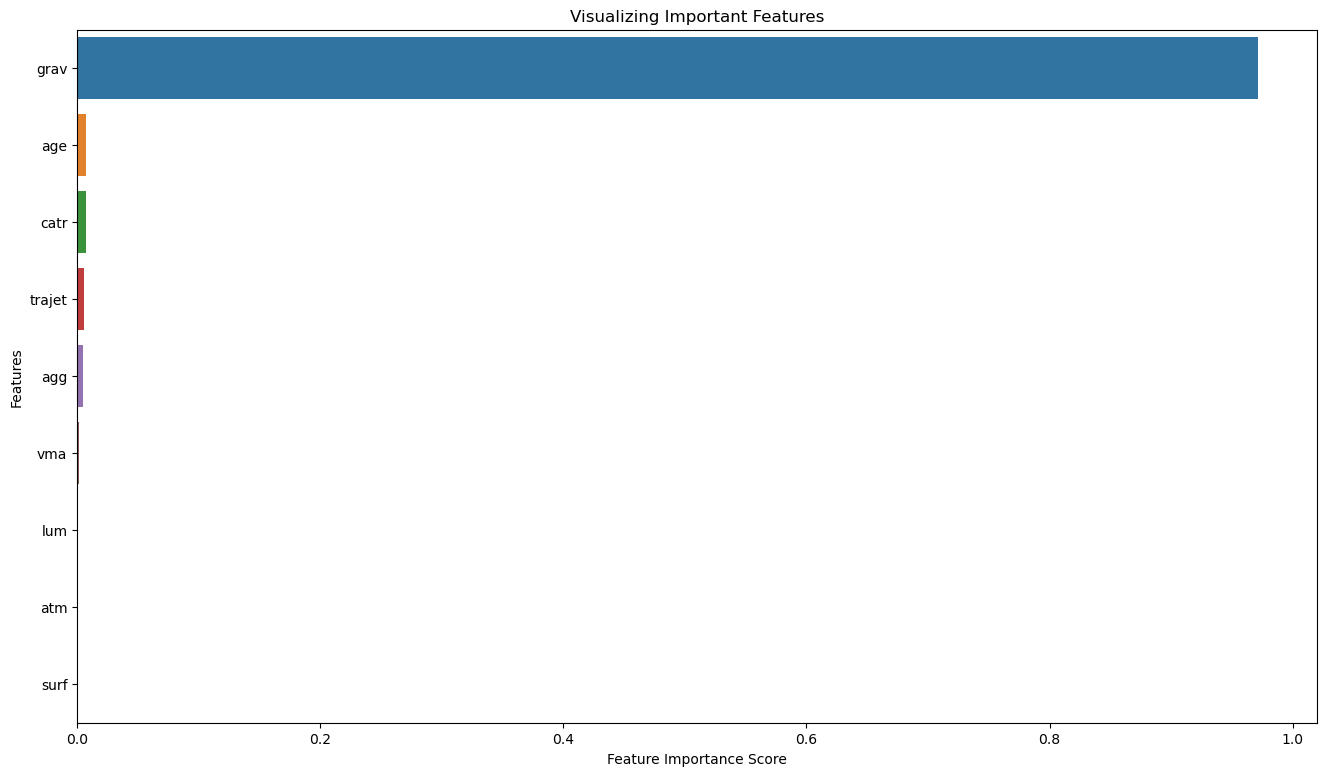

In [22]:
#plot
plt.figure(figsize=(16,9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [28]:
clf.feature_importances_

array([7.00008965e-04, 5.79827683e-03, 9.70383512e-01, 3.95476033e-04,
       3.57808397e-04, 1.42631673e-03, 8.32212565e-03, 8.00978909e-03,
       4.60668673e-03])

In [29]:
print(len(feature_imp.index))

9


In [30]:
columns[:-1]

['lum', 'trajet', 'grav', 'atm', 'surf', 'vma', 'age', 'catr']

In [39]:
y_pred

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

In [36]:
y_test

703205    1
266869    1
337734    1
661889    1
480244    1
         ..
63405     1
652050    1
467940    1
466167    2
141572    2
Name: grav, Length: 230112, dtype: int64

In [40]:
# one-hot encode the categorical variables in the feature matrix
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# one-hot encode the target variable
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [41]:
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accuracy moyenne pour 10 'fold cross validation' est {}%".format(round(scores*100,2)))

L'accuracy moyenne pour 10 'fold cross validation' est 100.0%


In [46]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [47]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')

ValueError: multilabel-indicator is not supported